In [1]:
import sys
print(sys.executable)

E:\anaconda3\envs\tensorflow21gpu\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output
%matplotlib inline

import tensorflow as tf
# import tensorflow_addons as tfa

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))
print(tf.config.list_physical_devices('GPU'))

tensorflow version: 2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU 사용 가능 여부: True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
train_pandas = pd.read_csv("train_job/train.csv")
train_usertags_pandas = pd.read_csv("train_job/user_tags.csv")
train_jobtags_pandas = pd.read_csv("train_job/job_tags.csv")
train_jobcompanies_pandas = pd.read_csv("train_job/job_companies.csv")
tags_pandas = pd.read_csv("train_job/tags.csv")

In [4]:
train_pandas.head()

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


In [5]:
train_usertags_pandas.head()

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a


In [6]:
train_jobtags_pandas.head()

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
3,e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d
4,e820a45f1dfc7b95282d10b6087e11c0,6c8dba7d0df1c4a79dd07646be9a26c8


In [7]:
from collections import defaultdict
usertagdict = defaultdict(list)
for u, t in train_usertags_pandas.values:
    usertagdict[u].append(t)
jobtagdict = defaultdict(list)
for j, t in train_jobtags_pandas.values:
    jobtagdict[j].append(t)

In [8]:
print(len(usertagdict['e576423831e043f7928d9ac113abbe6f']))
print(len(jobtagdict['320722549d1751cf3f247855f937b982']))

112
2


In [9]:
print(len(set(tags_pandas['tagID'].values)))

887


In [10]:
avg_usertag = sum(list(map(len,usertagdict.values()))) // len(usertagdict)
avg_jobtag = sum(list(map(len,jobtagdict.values()))) // len(jobtagdict)
print(avg_usertag, avg_jobtag)

87 4


In [11]:
train = train_pandas[:]

In [12]:
for t in list(set(tags_pandas['tagID'].values)):
    train[t] = 0

In [13]:
train.head()

,userID,jobID,applied,3de568f8597b94bda53149c7d7f5958c,149815eb972b3c370dee3b89d645ae14,2de5d16682c3c35007e4e92982f1a2ba,f55cadb97eaff2ba1980e001b0bd9842,3e89ebdb49f712c7d90d1b39e348bbbf,39e4973ba3321b80f37d9b55f63ed8b8,41bfd20a38bb1b0bec75acf0845530a7,...,944bdd9636749a0801c39b6e449dbedc,c6bff625bdb0393992c9d4db0c6bbe45,5f2c22cb4a5380af7ca75622a6426917,69a5b5995110b36a9a347898d97a610e,a89cf525e1d9f04d16ce31165e139a4b,8c00dee24c9878fea090ed070b44f1ab,f387624df552cea2f369918c5e1e12bc,43baa6762fa81bb43b39c62553b2970d,b1c00bcd4b5183705c134b3365f8c45e,40b5f25a228570053bc64a043c3f1833
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for i,(u,j) in enumerate(train[['userID','jobID']].values):
    for t in usertagdict[u]:
        train.loc[i,t] |= 1
    for t in jobtagdict[j]:
        train.loc[i,t] |= 1 << 1

In [16]:
train.to_csv('prac2_train1.csv')

In [17]:
train_jobcompanies_pandas.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [18]:
set(train_jobcompanies_pandas['companySize'].values)

{'1-10', '1000 이상', '101-200', '11-50', '201-500', '501-1000', '51-100', nan}

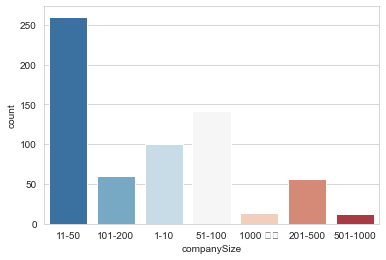

In [19]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='companySize',data=train_jobcompanies_pandas,palette='RdBu_r')

In [20]:
train_jobcompanies = train_jobcompanies_pandas[:]
train_jobcompanies['companySize'] = train_jobcompanies['companySize'].fillna('11-50')

In [21]:
companysizedict = {'1-10':1,'11-50':2,'51-100':3,'101-200':4,'201-500':5,'501-1000':6,'1000 이상':7}

In [22]:
jobsizedict = defaultdict(int)
for j,s in train_jobcompanies[['jobID','companySize']].values:
    jobsizedict[j] = companysizedict[s]

In [23]:
train['companySize'] = 1
for i,(j) in enumerate(train['jobID'].values):
    train.loc[i,'companySize'] = jobsizedict[j]
train.head()

,userID,jobID,applied,3de568f8597b94bda53149c7d7f5958c,149815eb972b3c370dee3b89d645ae14,2de5d16682c3c35007e4e92982f1a2ba,f55cadb97eaff2ba1980e001b0bd9842,3e89ebdb49f712c7d90d1b39e348bbbf,39e4973ba3321b80f37d9b55f63ed8b8,41bfd20a38bb1b0bec75acf0845530a7,...,c6bff625bdb0393992c9d4db0c6bbe45,5f2c22cb4a5380af7ca75622a6426917,69a5b5995110b36a9a347898d97a610e,a89cf525e1d9f04d16ce31165e139a4b,8c00dee24c9878fea090ed070b44f1ab,f387624df552cea2f369918c5e1e12bc,43baa6762fa81bb43b39c62553b2970d,b1c00bcd4b5183705c134b3365f8c45e,40b5f25a228570053bc64a043c3f1833,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [24]:
train.to_csv('prac2_train2.csv')

In [26]:
train_set = train.drop(['userID', 'jobID','applied'], axis=1)
predict_label = tf.cast(tf.one_hot(train['applied'],2), tf.int64)

In [27]:
train_set

,3de568f8597b94bda53149c7d7f5958c,149815eb972b3c370dee3b89d645ae14,2de5d16682c3c35007e4e92982f1a2ba,f55cadb97eaff2ba1980e001b0bd9842,3e89ebdb49f712c7d90d1b39e348bbbf,39e4973ba3321b80f37d9b55f63ed8b8,41bfd20a38bb1b0bec75acf0845530a7,e58cc5ca94270acaceed13bc82dfedf7,a226e450e214f350856e2980b6e55ac9,13168e6a2e6c84b4b7de9390c0ef5ec5,...,c6bff625bdb0393992c9d4db0c6bbe45,5f2c22cb4a5380af7ca75622a6426917,69a5b5995110b36a9a347898d97a610e,a89cf525e1d9f04d16ce31165e139a4b,8c00dee24c9878fea090ed070b44f1ab,f387624df552cea2f369918c5e1e12bc,43baa6762fa81bb43b39c62553b2970d,b1c00bcd4b5183705c134b3365f8c45e,40b5f25a228570053bc64a043c3f1833,companySize
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [28]:
predict_label

<tf.Tensor: shape=(6000, 2), dtype=int64, numpy=
array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int64)>

In [29]:
print(np.array(train_set), np.array(predict_label))

[[0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 4]
 [0 0 1 ... 0 0 3]
 [0 0 0 ... 0 0 5]] [[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [30]:
seed = 7
np.random.seed(seed)

# Model
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(10, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(5000, input_dim=888))
model.add(tf.keras.layers.Dense(2500))
model.add(tf.keras.layers.Dense(1250))
model.add(tf.keras.layers.Dense(625))
model.add(tf.keras.layers.Dense(312))
model.add(tf.keras.layers.Dense(56))
model.add(tf.keras.layers.Dense(28))
model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Dense(2, kernel_initializer='normal',activation=tf.nn.softmax))
model.add(tf.keras.layers.Dense(2))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_fit = model.fit(np.array(train_set), np.array(predict_label), epochs=5, batch_size=5, verbose=1,validation_split=0.1)

Train on 5400 samples, validate on 600 samples
Epoch 1/5
5400/5400 [==============================] - 12s 2ms/sample - loss: 2.2746 - accuracy: 0.1415 - val_loss: 2.5252 - val_accuracy: 0.1567
Epoch 2/5
5400/5400 [==============================] - 11s 2ms/sample - loss: 2.2774 - accuracy: 0.1413 - val_loss: 2.5252 - val_accuracy: 0.1567
Epoch 3/5
5400/5400 [==============================] - 11s 2ms/sample - loss: 2.2774 - accuracy: 0.1413 - val_loss: 2.5252 - val_accuracy: 0.1567
Epoch 4/5
5400/5400 [==============================] - 11s 2ms/sample - loss: 2.2774 - accuracy: 0.1413 - val_loss: 2.5252 - val_accuracy: 0.1567
Epoch 5/5
5400/5400 [==============================] - 11s 2ms/sample - loss: 2.2774 - accuracy: 0.1413 - val_loss: 2.5252 - val_accuracy: 0.1567


In [31]:
model.evaluate(np.array(train_set), np.array(predict_label))

6000/6000 [==============================] - 1s 129us/sample - loss: 2.3022 - accuracy: 0.1428


[2.3022013250986735, 0.14283334]

In [32]:
test_pandas = pd.read_csv("test_job.csv")

In [33]:
test_pandas.head()

,userID,jobID
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4


In [34]:
test = test_pandas[:]

for t in list(set(tags_pandas['tagID'].values)):
    test[t] = 0

test['companySize'] = 1
for i,(u,j) in enumerate(test[['userID','jobID']].values):
    for t in usertagdict[u]:
        test.loc[i,t] |= 1
    for t in jobtagdict[j]:
        test.loc[i,t] |= 1 << 1
    test.loc[i,'companySize'] = jobsizedict[j]
test

,userID,jobID,3de568f8597b94bda53149c7d7f5958c,149815eb972b3c370dee3b89d645ae14,2de5d16682c3c35007e4e92982f1a2ba,f55cadb97eaff2ba1980e001b0bd9842,3e89ebdb49f712c7d90d1b39e348bbbf,39e4973ba3321b80f37d9b55f63ed8b8,41bfd20a38bb1b0bec75acf0845530a7,e58cc5ca94270acaceed13bc82dfedf7,...,c6bff625bdb0393992c9d4db0c6bbe45,5f2c22cb4a5380af7ca75622a6426917,69a5b5995110b36a9a347898d97a610e,a89cf525e1d9f04d16ce31165e139a4b,8c00dee24c9878fea090ed070b44f1ab,f387624df552cea2f369918c5e1e12bc,43baa6762fa81bb43b39c62553b2970d,b1c00bcd4b5183705c134b3365f8c45e,40b5f25a228570053bc64a043c3f1833,companySize
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,5
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [35]:
test.to_csv("prac2_test1.csv")

In [36]:
test_set = test.drop(['userID','jobID'], axis=1)

In [37]:
y_predict = model(np.array(test_set))

In [38]:
print(y_predict)

tf.Tensor(
[[ -78.296646   37.221737]
 [-157.56882    74.28921 ]
 [ -74.03206    34.93022 ]
 ...
 [-221.0675    103.513885]
 [-137.76605    64.64481 ]
 [-174.96725    81.691315]], shape=(2435, 2), dtype=float32)


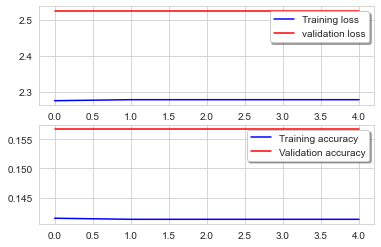

In [39]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_fit.history['loss'], color='b', label="Training loss")
ax[0].plot(history_fit.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_fit.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_fit.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [41]:
val_label_num = np.argmax(y_predict, axis=1).reshape(-1,1)

In [42]:
val_label_num

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [43]:
result = pd.DataFrame(val_label_num,columns=['applied'])
result

,applied
0,1
1,1
2,1
3,1
4,1
...,...
2430,1
2431,1
2432,1
2433,1


In [44]:
import datetime
now = datetime.datetime.now()
result.to_csv('output_{}.csv'.format(now.strftime('%y_%m_%d_%H_%M_%S')), index=False)

In [47]:
print(len(set(train['userID'].values)),len(set(train['jobID'].values)))
print(len(set(test['userID'].values)),len(set(test['jobID'].values)))

196 708
196 591


In [49]:
train_new = train.loc[:, (train != 0).any(axis=0)]

In [50]:
train

,userID,jobID,applied,3de568f8597b94bda53149c7d7f5958c,149815eb972b3c370dee3b89d645ae14,2de5d16682c3c35007e4e92982f1a2ba,f55cadb97eaff2ba1980e001b0bd9842,3e89ebdb49f712c7d90d1b39e348bbbf,39e4973ba3321b80f37d9b55f63ed8b8,41bfd20a38bb1b0bec75acf0845530a7,...,c6bff625bdb0393992c9d4db0c6bbe45,5f2c22cb4a5380af7ca75622a6426917,69a5b5995110b36a9a347898d97a610e,a89cf525e1d9f04d16ce31165e139a4b,8c00dee24c9878fea090ed070b44f1ab,f387624df552cea2f369918c5e1e12bc,43baa6762fa81bb43b39c62553b2970d,b1c00bcd4b5183705c134b3365f8c45e,40b5f25a228570053bc64a043c3f1833,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [51]:
train_new

,userID,jobID,applied,149815eb972b3c370dee3b89d645ae14,2de5d16682c3c35007e4e92982f1a2ba,3e89ebdb49f712c7d90d1b39e348bbbf,39e4973ba3321b80f37d9b55f63ed8b8,41bfd20a38bb1b0bec75acf0845530a7,e58cc5ca94270acaceed13bc82dfedf7,9a3d458322d70046f63dfd8b0153ece4,...,c21002f464c5fc5bee3b98ced83963b8,291597a100aadd814d197af4f4bab3a7,8f1d43620bc6bb580df6e80b0dc05c48,f6c79f4af478638c39b206ec30ab166b,944bdd9636749a0801c39b6e449dbedc,c6bff625bdb0393992c9d4db0c6bbe45,5f2c22cb4a5380af7ca75622a6426917,69a5b5995110b36a9a347898d97a610e,b1c00bcd4b5183705c134b3365f8c45e,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,4
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
